<a href="https://colab.research.google.com/github/dlskawns/job_train/blob/master/11%2C_12th_CP2_temporary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

sheet_id = "1h-iL2hvdojoAk5ZK8tg7XdlYwu5wy5rPGnIsItZ3COI"
sheet_name = "cp2v2"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df1 = pd.read_excel('/content/drive/MyDrive/[AIB] Section Survey (TypeForm).gsheet', sheet_name= 5)

## 8/12 - 11,12기 CP2 경험 분석

## 환경설정


In [1]:
# 경고 없애기
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# # 나눔폰츠 설치 -> 실행 후 런타임 리셋해야함
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
# 나눔폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 155698 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import font_manager,rc

font_list = fm.findSystemFonts()
font_path= '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

## 데이터셋 불러오기

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [107]:
import pandas as pd

# # CP1 데이터셋 (사용안함)
# df1 = pd.read_excel('/content/drive/MyDrive/고객만족도조사0615_2xlsx.xlsx', sheet_name= 6)

# CP2 데이터셋 
df2 = pd.read_excel('/content/drive/MyDrive/[AIB] Section Survey (TypeForm).xlsx', sheet_name= 7)


## 초간단 EDA 및 특성공학

In [110]:
# 기수 및 기수 별 인원확인
for i, j in zip(df2.기수.value_counts().index, df2.기수.value_counts().values):
  if i == 11 or i == 12:
    print(f"{int(i)}기: {j}명")

12기: 18명
11기: 15명


In [111]:
# 추천점수 결측치 해결
df2['CP2 자기 주도 프로젝트 추천점수'] = df2['CP2 자기 주도 프로젝트 추천점수'].fillna('').map(lambda x: int(x[0]) if x != '' else x)
df2['CP2 기업 프로젝트 추천점수'] = df2['CP2 기업 프로젝트 추천점수'].fillna('').map(lambda x: int(x[0]) if x != '' else x)
# 만족도 결측치 해결
df2['CP2 완성도에 대한 만족도'] = df2['CP2 완성도에 대한 만족도'].fillna('').map(lambda x: int(x[0]) if x != '' else x)

In [113]:
# 9,10기 데이터
df910 = df2[(df2['기수']==9)|(df2['기수']==10)]

# 7,8기 데이터
df78 = df2[(df2['기수']==7)|(df2['기수']==8)]

# 11,12기 데이터
df1112 = df2[(df2['기수']==11)|(df2['기수']==12)]

In [114]:
# 기업 분류와 코드스테이츠 여부를 파악하는 컬럼 이름 변경
df1112.rename(columns= {'Unnamed: 40': '기업여부', 'Unnamed: 41': '코드여부'}, inplace = True)

#### [전체] 완성 만족도 및 추천 점수 데이터

In [116]:
import numpy as np
#평균 점수 파악
print(f"7,8기 자기주도 프로젝트 추천점수 평균: {round(np.mean(df78[df78['CP2 자기 주도 프로젝트 추천점수']!='']['CP2 자기 주도 프로젝트 추천점수']),2)}")
print(f"7,8기 기업 프로젝트 추천점수 평균: {round(np.mean(df78[df78['CP2 기업 프로젝트 추천점수']!='']['CP2 기업 프로젝트 추천점수']),2)}")
print(f"\n9,10기 자기주도 프로젝트 추천점수 평균: {round(np.mean(df910[df910['CP2 자기 주도 프로젝트 추천점수']!='']['CP2 자기 주도 프로젝트 추천점수']),2)}")
print(f"9,10기 기업 프로젝트 추천점수 평균: {round(np.mean(df910[df910['CP2 기업 프로젝트 추천점수']!='']['CP2 기업 프로젝트 추천점수']),2)}")

print(f"\n11, 12기 자기주도 프로젝트 추천점수 평균: {round(np.mean(df1112[df1112['CP2 자기 주도 프로젝트 추천점수']!='']['CP2 자기 주도 프로젝트 추천점수']),2)}")
print(f"11, 12기 기업 프로젝트 추천점수 평균: {round(np.mean(df1112[df1112['CP2 기업 프로젝트 추천점수']!='']['CP2 기업 프로젝트 추천점수']),2)}")

7,8기 자기주도 프로젝트 추천점수 평균: 4.89
7,8기 기업 프로젝트 추천점수 평균: 4.81

9,10기 자기주도 프로젝트 추천점수 평균: 4.0
9,10기 기업 프로젝트 추천점수 평균: 4.7

11, 12기 자기주도 프로젝트 추천점수 평균: 5.44
11, 12기 기업 프로젝트 추천점수 평균: 4.58


In [117]:
print(f"전체 자기 주도 프로젝트 추천점수 평균: {np.mean(df2[df2['CP2 자기 주도 프로젝트 추천점수']!='']['CP2 자기 주도 프로젝트 추천점수'])}")
print(f"전체 기업 프로젝트 추천점수 평균: {np.mean(df2[df2['CP2 기업 프로젝트 추천점수']!='']['CP2 기업 프로젝트 추천점수'])}")

전체 자기 주도 프로젝트 추천점수 평균: 4.913043478260869
전체 기업 프로젝트 추천점수 평균: 4.676056338028169


자기주도 프로젝트: 평균 최고점 갱신  
기업협업 프로젝트: 평균 최하점 갱신

In [118]:
print(f"7,8기 CP2 완성도에 대한 만족도 평균: {np.mean(df78[df78['CP2 완성도에 대한 만족도']!='']['CP2 완성도에 대한 만족도'])}")
print(f"9,10기 CP2 완성도에 대한 만족도 평균: {np.mean(df910[df910['CP2 완성도에 대한 만족도']!='']['CP2 완성도에 대한 만족도'])}")
print(f"11,12기 CP2 완성도에 대한 만족도 평균: {np.mean(df1112[df1112['CP2 완성도에 대한 만족도']!='']['CP2 완성도에 대한 만족도'])}")
print(f"전체 CP2 완성도에 대한 만족도 평균: {np.mean(df2[df2['CP2 완성도에 대한 만족도']!='']['CP2 완성도에 대한 만족도'])}")

7,8기 CP2 완성도에 대한 만족도 평균: 4.228571428571429
9,10기 CP2 완성도에 대한 만족도 평균: 3.92
11,12기 CP2 완성도에 대한 만족도 평균: 4.212121212121212
전체 CP2 완성도에 대한 만족도 평균: 4.138297872340425


In [119]:
# df910['CP2에서 가장 어려운 점(기업)'].fillna('없음', inplace = True)
# df910['CP2에서 가장 어려운 점(자기 주도 프로젝트)'].fillna('없음', inplace = True)

# df910['CP2 어려운점'] = df910['CP2에서 가장 어려운 점(기업)']+df910['CP2에서 가장 어려운 점(자기 주도 프로젝트)']
# df910['CP2 어려운점'] = df910['CP2 어려운점'].map(lambda x: x.replace('없음',''))

df1112['CP2에서 가장 어려운 점(기업)'].fillna('없음', inplace = True)
df1112['CP2에서 가장 어려운 점(자기 주도 프로젝트)'].fillna('없음', inplace = True)

df1112['CP2 어려운점'] = df1112['CP2에서 가장 어려운 점(기업)']+df1112['CP2에서 가장 어려운 점(자기 주도 프로젝트)']
df1112['CP2 어려운점'] = df1112['CP2 어려운점'].map(lambda x: x.replace('없음',''))

#### [기업 별] 11,12기 완성 만족도 및 추천 점수 데이터

In [125]:

# 개인, 기업 프로젝트 컬럼을 합쳐주는 작업
df1112['추천점수'] = df1112['CP2 자기 주도 프로젝트 추천점수'].map(lambda x: 0 if x == '' else x)+\
df1112['CP2 기업 프로젝트 추천점수'].map(lambda x: 0 if x == '' else x)

# 추천점수 파악을 위한 새로운 데이터프레임 생성
df_rec = df1112.groupby('기업여부')['추천점수'].mean().reset_index()

#인원 파악을 위한 '인원'컬럼 추가

df_rec['만족도'] =df1112.groupby('기업여부')['CP2 완성도에 대한 만족도'].mean().values
df_rec['인원'] = df1112.groupby('기업여부')['기업여부'].count().values
# 기업별 완성 만족도 및 추천 점수, 인원
df_rec.rename(columns = {'CP2 완성도에 대한 만족도': '만족도'}, inplace = True)
df_rec

,기업여부,추천점수,만족도,인원
0,개인,5.444444,4.555556,9
1,넥스트랩,5.200000,4.200000,5
2,분석&추천,5.600000,4.800000,5
3,올마이투어,3.000000,3.500000,8
4,와플,3.500000,2.500000,2
5,후케어스코리아,6.250000,5.000000,4


In [127]:
# 멀티 플랏을 위한 멜팅작업
df_melt = df_rec[['기업여부','만족도','추천점수']].melt(id_vars = '기업여부', var_name = '항목', value_name = '점수' )

In [128]:
import seaborn as sns

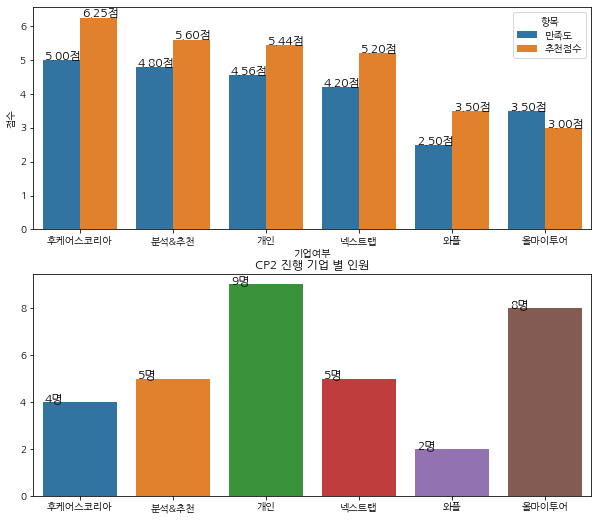

In [157]:
# 추천점수 높은 순으로 나열
fig, ax = plt.subplots(2,1)
ttl = len(df1112)
ax1 = sns.barplot(x = '기업여부', y = '점수', hue = '항목', data = df_melt, 
            order = df_rec.sort_values(ascending = False, by = '추천점수')['기업여부'].values, ax = ax[0])
for p in ax1.patches:
  ax1.annotate('{:.2f}점'.format(p.get_height(), p.get_height()/ttl*100), (p.get_x()+0.025, p.get_height()+0.01), size=12)
plt.title('CP2 진행 기업 별 만족도 및 추천점수')

ax2 = sns.barplot(df_rec.sort_values(ascending = False, by = '추천점수')['기업여부'].values, df_rec.sort_values(ascending = False, by = '추천점수')['인원'].values, ax = ax[1]) 
for p in ax2.patches:
  ax2.annotate('{:.0f}명'.format(p.get_height(), p.get_height()/ttl*100), (p.get_x()+0.025, p.get_height()+0.01), size=12)

plt.title('CP2 진행 기업 별 인원')
plt.rcParams['figure.figsize'] = (10,10);
plt.show();

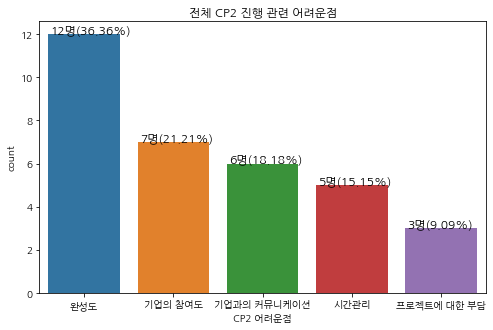

In [153]:
ax = sns.countplot(df1112['CP2 어려운점'], order = df1112['CP2 어려운점'].value_counts().index)
for p in ax.patches:
  ax.annotate('{:.0f}명({:.2f}%)'.format(p.get_height(), p.get_height()/ttl*100), (p.get_x()+0.025, p.get_height()+0.01), size=12)
plt.title('전체 CP2 진행 관련 어려운점')
plt.rcParams['figure.figsize'] = (5,5)
plt.show();

In [138]:
import numpy as np
rec_scores = []
sat_scores = []
for i in df1112['CP2 어려운점'].value_counts().index:
  rec_scores.append(round(np.mean(df1112[df1112['CP2 어려운점']==i]['추천점수']),2))
  sat_scores.append(round(np.mean(df1112[df1112['CP2 어려운점']==i]['CP2 완성도에 대한 만족도']),2))

In [ ]:
df1112['CP2 어려운점'].value_counts().index[i]

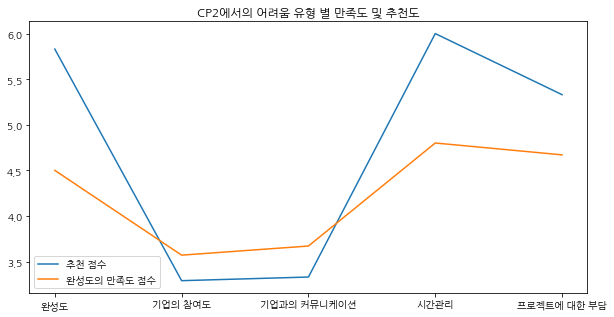

In [141]:
ax1 = sns.lineplot(df1112['CP2 어려운점'].value_counts().index, rec_scores)
ax2 = sns.lineplot(df1112['CP2 어려운점'].value_counts().index, sat_scores)

plt.rcParams['figure.figsize'] = (8,5)
plt.legend(['추천 점수','완성도의 만족도 점수'])
plt.title('CP2에서의 어려움 유형 별 만족도 및 추천도')
plt.show()

유형 별로 보았을 때,   
**'기업의 참여도'**과 **'기업과의 커뮤니케이션'**가 추천 점수 및 만족도 점수가 매우 낮음을 확인

In [143]:
# 프로젝트에 대한 부담 유형의 기업여부 및 추천점수, 만족도점수 파악
df1112[df1112['CP2 어려운점']=='기업의 참여도'][['기업여부','추천점수', 'CP2 완성도에 대한 만족도','기타의견']]

,기업여부,추천점수,CP2 완성도에 대한 만족도,기타의견
69,올마이투어,1,2,"기업협업을 진행하기 전, 진행 방식을 기업 측에게 구체적으로 요구하면 좋겠습니다. ..."
74,넥스트랩,4,5,다양한 도메인의 기업이 참여했으면 좋겠습니다. 설문조사 때 매겼던 순위와 다른 기업...
79,올마이투어,2,2,기업이 적극적으로 참여하지 않아서 딱히 도움이 되지 않았습니다 그 점이 매우 아쉬웠...
82,올마이투어,4,5,기업협업을 진행할때 데이터를 조금더 빨리 받았다면 더 좋은 결과물이 나왔을텐데 아쉽...
87,넥스트랩,3,5,기업 프로젝트라 조금더 실제 기업에서 진행하는 협업을 기대했지만 생각보다 그냥 데이...
89,와플,4,2,기업협업 프로젝트에서 만약 이전기수에서 한 프로젝트와 연결이된 것을 진행한다면 사전...
94,올마이투어,5,4,NaN


In [144]:
# 프로젝트에 대한 부담 유형의 기업여부 및 추천점수, 만족도점수 파악
df1112[df1112['CP2 어려운점']=='기업과의 커뮤니케이션'][['기업여부','추천점수', 'CP2 완성도에 대한 만족도','기타의견']]

,기업여부,추천점수,CP2 완성도에 대한 만족도,기타의견
67,올마이투어,1,1,기업협업을 하는 이유는 기업 내 실제 데이터의 흐름을 파악하고 전체 프로세스 중 일...
68,와플,3,3,목표에 대한 명확한 설명
76,올마이투어,5,6,"기업에서 자사의 데이터가 외부로 유출되는 상황을 걱정하여 조심스러운 것은 알지만, ..."
80,올마이투어,4,5,기업이 적극적인지 미리 아는 것이 쉽지는 않겠지만 협업 기업 선정을 잘 해주셔야 할...
83,후케어스코리아,5,4,코치님들의 도움이 조금 더 필요할 것 같다
97,올마이투어,2,3,"올마이투어를 진행하면서, 1. 지원자 12명을 전부 프로젝트에 투입했는데 과합니다...."


## Text 분석

### 키워드 추출 -> 데이터 부족으로인해 의미없음

#### 메캅 환경설정

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

#### 명사 추출

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
stopword = ['프로젝트','CP2']

In [ ]:
df2['기타의견'] = df2['기타의견'].fillna('없음')

In [ ]:
import re
from collections import Counter

def token_counter(df, text_pos, num, stopword):
  sentence_tag = []
  for text in df['기타의견']:
    # 특수문자제거
    con = re.compile(r'[^ A-Za-z0-9가-힣+]')
    cleaned = con.sub('', text).lower()
    morphs = mecab.pos(cleaned)
    sentence_tag.append(morphs)
  container = 0
  result = []
  for sentence in sentence_tag:
    for word, tag in sentence:
      if (tag == text_pos)and (len(word) > 1) and (word not in stopword):
        result.append(word)
  counts = Counter(result)
  top_keyword = counts.most_common(num) 
  return top_keyword


In [ ]:
token_counter(df2, 'NNG', 100, stopword)

### 9,10기 Text(기타의견) 추출

In [145]:
for i in df1112['기타의견']:
  print('>>>', i, '\n')

>>> 회사에 들어갔다 생각하고 프로젝트 하라고 했는데 마음가짐은 회사원이지만 실제로는 훈련병 때로 돌아간것 같은 느낌이었습니다 

>>> 없음 

>>> nan 

>>> 기업협업을 하는 이유는 기업 내 실제 데이터의 흐름을 파악하고 전체 프로세스 중 일부라도 직접 참여해보는 기회가 되길 바랬지만 전혀 이루어지지않음. 기업에서 제대로 된 데이터를 제공받기까지 20일 이상 소요되었으며 초기 14일은 아무런 커뮤니케이션 조차 이루어지지 않음. 

>>> 목표에 대한 명확한 설명 

>>> 기업협업을 진행하기 전, 진행 방식을 기업 측에게 구체적으로 요구하면 좋겠습니다. 전혀 준비되어 있지 않은 기업이라 느꼈으며, 특히 데이터를 받는 시간이 오래 걸린 것은 아직도 이해가 어렵네요. 기업과 이런 부분은 CP2진행 이전에 협의가 된 상태여야 한다고 생각됩니다. 

>>> 이번에 코드스테이츠 프로젝트를 주도하신 이남준 코치님이 매우 잘이끌어주셔서 프로젝트를 하면서 많이 배워갔습니다. 

>>> 협업기업의 수와 관련 주제가 협소한 느낌이어서 좀 다양하게 만들었으면 좋을 듯 합니다. 

>>> 없음 

>>> 다양한 도메인의 기업이 참여했으면 좋겠습니다. 설문조사 때 매겼던 순위와 다른 기업의 프로젝트를 진행해야해서 당황스러웠습니다. 

>>> 다양한 선택지를 제외하고는 부족한 점이 없는 것 같습니다. 

>>> 기업에서 자사의 데이터가 외부로 유출되는 상황을 걱정하여 조심스러운 것은 알지만, 이를 감안하더라도 초기에 협력 자세가 부족하여 개인적으로 많은 시간이 아쉽게 흘러간 느낌을 받았습니다. 기업에서도 원하는 목표와 본인들의 역량을 구체적으로 밝힌다면, 코드스테이츠 참여자들이 프로젝트를 진행함에 있어서 좀 더 구체적이고 효율적인 계획 작성과 좀 더 나은 성과를 기록할 수 있을 것 같습니다. 

>>> 코치님들이 많이 도와주시고 좋았습니다 

>>> 없습니다 

>>> 기업이 적극적으로 참여하지 않아서 딱히 도움이 되지 않았습니다 그 점이 매우 아쉬웠습니다. 프로젝트가 

### 기업 별 Text 추출

In [146]:
def printing(df, 기업):
  for i in df[df['기업여부']==기업]['기타의견']:
    if type(i) != float and len(i)> 5:
      print(f">>>{i}\n")
    else:
      pass

In [147]:
printing(df1112, '와플')

>>>목표에 대한 명확한 설명

>>>기업협업 프로젝트에서 만약 이전기수에서 한 프로젝트와 연결이된 것을 진행한다면 사전에 고지해주셧으면 좋겟스니다



In [148]:
printing(df1112, '후케어스코리아')

>>>데이터 직군이 있는 기업으로 구성된다면 더욱 좋을것 같습니다.

>>>코치님들의 도움이 조금 더 필요할 것 같다

>>>기업 협업 중간에 커리어 코칭이 있다기보단 커리어 시간은 따로 주욱 빼서 집중할 수 있게 해주었으면 좋겠다. 약간 커리어 코칭이 cp2 사이사이 끼면서 cp2에 온전히 집중한 결과 커리어 준비 부분은 많이 놓치게 되지 않았나 싶다. 오히려 커리어에 포커스해야 하나 싶기도 하는 불안감이 생긴다.

>>>기업협업에서는 특별하게 문제는 없었던것 같습니다.



In [149]:
printing(df1112, '올마이투어')

>>>기업협업을 하는 이유는 기업 내 실제 데이터의 흐름을 파악하고 전체 프로세스 중 일부라도 직접 참여해보는 기회가 되길 바랬지만 전혀 이루어지지않음. 기업에서 제대로 된 데이터를 제공받기까지 20일 이상 소요되었으며 초기 14일은 아무런 커뮤니케이션 조차 이루어지지 않음.

>>>기업협업을 진행하기 전, 진행 방식을 기업 측에게 구체적으로 요구하면 좋겠습니다. 전혀 준비되어 있지 않은 기업이라 느꼈으며, 특히 데이터를 받는 시간이 오래 걸린 것은 아직도 이해가 어렵네요. 기업과 이런 부분은 CP2진행 이전에 협의가 된 상태여야 한다고 생각됩니다.

>>>기업에서 자사의 데이터가 외부로 유출되는 상황을 걱정하여 조심스러운 것은 알지만, 이를 감안하더라도 초기에 협력 자세가 부족하여 개인적으로 많은 시간이 아쉽게 흘러간 느낌을 받았습니다. 기업에서도 원하는 목표와 본인들의 역량을 구체적으로 밝힌다면, 코드스테이츠 참여자들이 프로젝트를 진행함에 있어서 좀 더 구체적이고 효율적인 계획 작성과 좀 더 나은 성과를 기록할 수 있을 것 같습니다.

>>>기업이 적극적으로 참여하지 않아서 딱히 도움이 되지 않았습니다 그 점이 매우 아쉬웠습니다. 프로젝트가 끝났는데 빈말로라도 수고했다는 말이 없네요 ㅎㅎ... ^^...

>>>기업이 적극적인지 미리 아는 것이 쉽지는 않겠지만 협업 기업 선정을 잘 해주셔야 할 것 같습니다. 4주라는 긴 시간인데 기업이 협조적이지 않으면 프로젝트 구성원들에게는 시간을 허비하는 것이나 다름없다고 생각합니다.

>>>기업협업을 진행할때 데이터를 조금더 빨리 받았다면 더 좋은 결과물이 나왔을텐데 아쉽습니다,

>>>올마이투어를 진행하면서, 1. 지원자 12명을 전부 프로젝트에 투입했는데 과합니다. 다른 프로젝트에 배정하더라도 인원수를 줄였어야 한다고 생각합니다. 2. 기업의 준비/커뮤니케이션 부족한 것이 많이 느껴졌습니다. 본인들이 진행하려고 하는 프로젝트가 가능한지, 데이터는 어떤 걸 준비해야 하는지 잘 모르시다는 느낌이었습니다. 사실 이것보다

In [150]:
printing(df1112, '넥스트랩')

>>>다양한 도메인의 기업이 참여했으면 좋겠습니다. 설문조사 때 매겼던 순위와 다른 기업의 프로젝트를 진행해야해서 당황스러웠습니다.

>>>다양한 선택지를 제외하고는 부족한 점이 없는 것 같습니다.

>>>기업 프로젝트라 조금더 실제 기업에서 진행하는 협업을 기대했지만 생각보다 그냥 데이터만 던져주고 나머지는 알아서해라. 라서 별로였다



In [151]:
printing(df1112, '분석&추천')

>>>이번에 코드스테이츠 프로젝트를 주도하신 이남준 코치님이 매우 잘이끌어주셔서 프로젝트를 하면서 많이 배워갔습니다.

>>>코치님들이 많이 도와주시고 좋았습니다



In [152]:
printing(df1112, '개인')

>>>회사에 들어갔다 생각하고 프로젝트 하라고 했는데 마음가짐은 회사원이지만 실제로는 훈련병 때로 돌아간것 같은 느낌이었습니다

>>>협업기업의 수와 관련 주제가 협소한 느낌이어서 좀 다양하게 만들었으면 좋을 듯 합니다.

>>>기업 협업 , 조편성 까지 조금 일찍 정해져서 미리 기획을 할 수 있었으면  어떨까 하는 짧은 생각.

>>>더 많은 기업들이 참여했으면 좋겠습니다

